In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [188]:
df=pd.read_excel("Customer Conversion Prediction.xlsx")
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,management,married,tertiary,unknown,5.0,may,261.0,1.0,unknown,no
1,44.0,technician,single,secondary,unknown,5.0,may,151.0,1.0,unknown,no
2,33.0,entrepreneur,married,secondary,unknown,5.0,may,76.0,1.0,unknown,no
3,47.0,blue-collar,married,unknown,unknown,5.0,may,92.0,1.0,unknown,no
4,33.0,unknown,single,unknown,unknown,5.0,may,198.0,1.0,unknown,no


In [189]:
df.shape

(45211, 11)

In [190]:
df.dtypes

age               float64
job                object
marital            object
education_qual     object
call_type          object
day               float64
mon                object
dur               float64
num_calls         float64
prev_outcome       object
y                  object
dtype: object

In [191]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [192]:
df.rename(columns={"y":"target"},inplace=True)

In [193]:
df=df.drop_duplicates()

In [194]:
df.shape

(45205, 11)

([<matplotlib.patches.Wedge at 0x7faa16908e20>,
 [Text(-0.3952810366448843, -1.0265246719241314, 'no'),
  Text(0.3952810606724291, 1.0265246626719104, 'yes')],
 [Text(-0.21560783816993687, -0.5599225483222535, '88.30%'),
  Text(0.21560785127587037, 0.5599225432755874, '11.70%')])

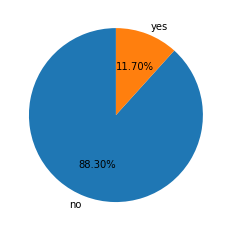

In [195]:
plt.pie(df["target"].value_counts(),autopct='%1.2f%%',startangle=90,labels=["no","yes"])

**It is a Imbalanced dataset**

In [196]:
df["target"]=df["target"].map({"no":0,"yes":1})

In [ ]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,target
0,58.0,management,married,tertiary,unknown,5.0,may,261.0,1.0,unknown,0
1,44.0,technician,single,secondary,unknown,5.0,may,151.0,1.0,unknown,0
2,33.0,entrepreneur,married,secondary,unknown,5.0,may,76.0,1.0,unknown,0
3,47.0,blue-collar,married,unknown,unknown,5.0,may,92.0,1.0,unknown,0
4,33.0,unknown,single,unknown,unknown,5.0,may,198.0,1.0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,technician,married,tertiary,cellular,17.0,nov,977.0,3.0,unknown,1
45207,71.0,retired,divorced,primary,cellular,17.0,nov,456.0,2.0,unknown,1
45208,72.0,retired,married,secondary,cellular,17.0,nov,1127.0,5.0,success,1
45209,57.0,blue-collar,married,secondary,telephone,17.0,nov,508.0,4.0,unknown,0


**EDA**

In [199]:
df["marital"].value_counts()

married     27210
single      12788
divorced     5207
Name: marital, dtype: int64

In [200]:
df.groupby("num_calls")["target"].value_counts().head(10)

num_calls  target
1.0        0         14981
           1          2561
2.0        0         11102
           1          1401
3.0        0          4903
           1           618
4.0        0          3203
           1           317
5.0        0          1625
           1           139
Name: target, dtype: int64

In [201]:
df.groupby("call_type")["target"].value_counts()

call_type  target
cellular   0         24913
           1          4369
telephone  0          2516
           1           390
unknown    0         12487
           1           530
Name: target, dtype: int64

In [202]:
df.groupby("education_qual")["target"].value_counts()

education_qual  target
primary         0          6259
                1           591
secondary       0         20749
                1          2450
tertiary        0         11303
                1          1996
unknown         0          1605
                1           252
Name: target, dtype: int64

In [203]:
job_order = df.groupby('job')['target'].mean().reset_index().sort_values('target')['job']
marital_order = df.groupby('marital')['target'].mean().reset_index().sort_values('target')['marital']
qual_order = df.groupby('education_qual')['target'].mean().reset_index().sort_values('target')['education_qual']
call_order = df.groupby('call_type')['target'].mean().reset_index().sort_values('target')['call_type']
prev_order = df.groupby('prev_outcome')['target'].mean().reset_index().sort_values('target')['prev_outcome']
mon_order = df.groupby('mon')['target'].mean().reset_index().sort_values('target')['mon']

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


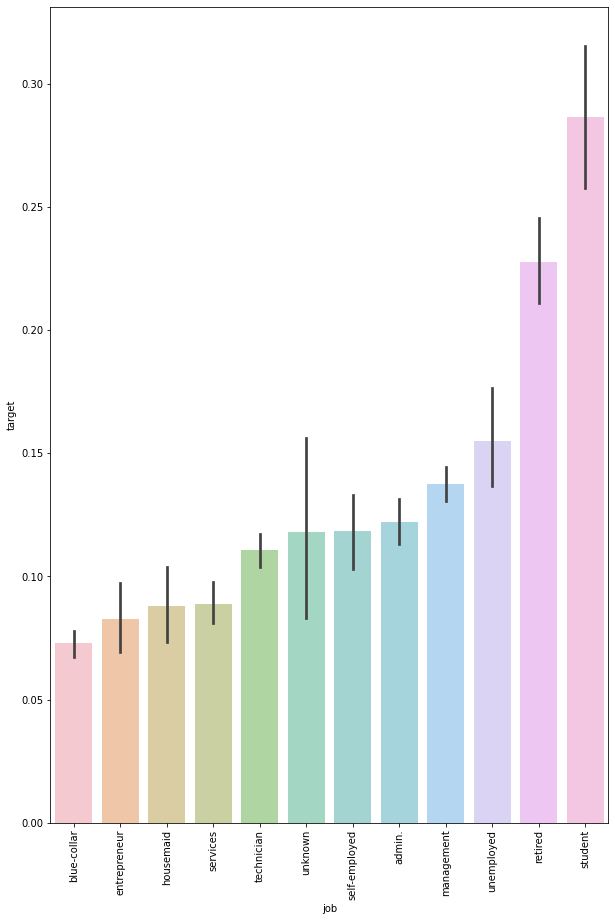

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


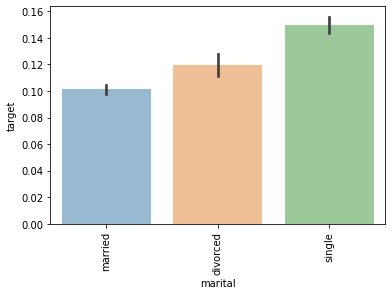

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


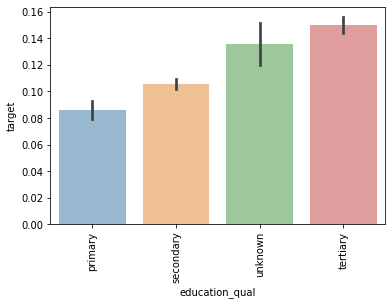

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


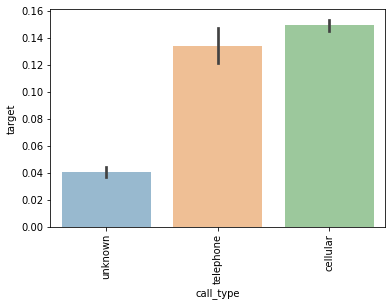

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


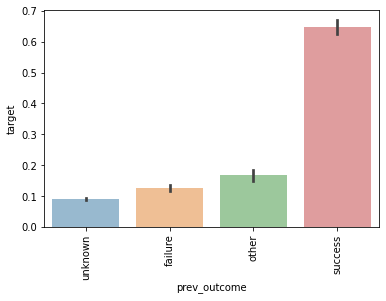

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


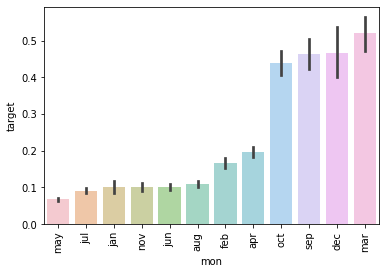

In [204]:
plt.figure(figsize=(10,15))


sns.barplot(df["job"],df["target"],alpha=0.50,order=job_order)
plt.xticks(rotation=90)
plt.show()


sns.barplot(df["marital"],df["target"],alpha=0.50,order=marital_order)
plt.xticks(rotation=90)
plt.show()


sns.barplot(df["education_qual"],df["target"],alpha=0.50,order=qual_order)
plt.xticks(rotation=90)
plt.show()


sns.barplot(df["call_type"],df["target"],alpha=0.50,order=call_order)
plt.xticks(rotation=90)
plt.show()

sns.barplot(df["prev_outcome"],df["target"],alpha=0.50,order=prev_order)
plt.xticks(rotation=90)
plt.show()

sns.barplot(df["mon"],df["target"],alpha=0.50,order=mon_order)
plt.xticks(rotation=90)
plt.show()


From the above visualisation it is clear that all the categorical data have the linear relationship with respect to target.

<AxesSubplot:>

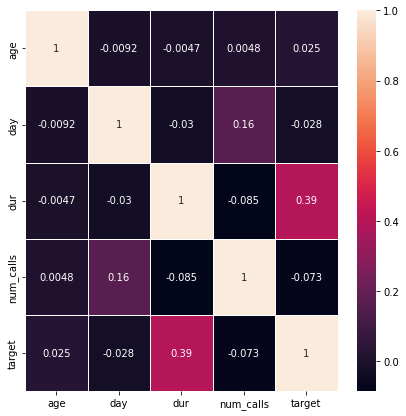

In [205]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.8)

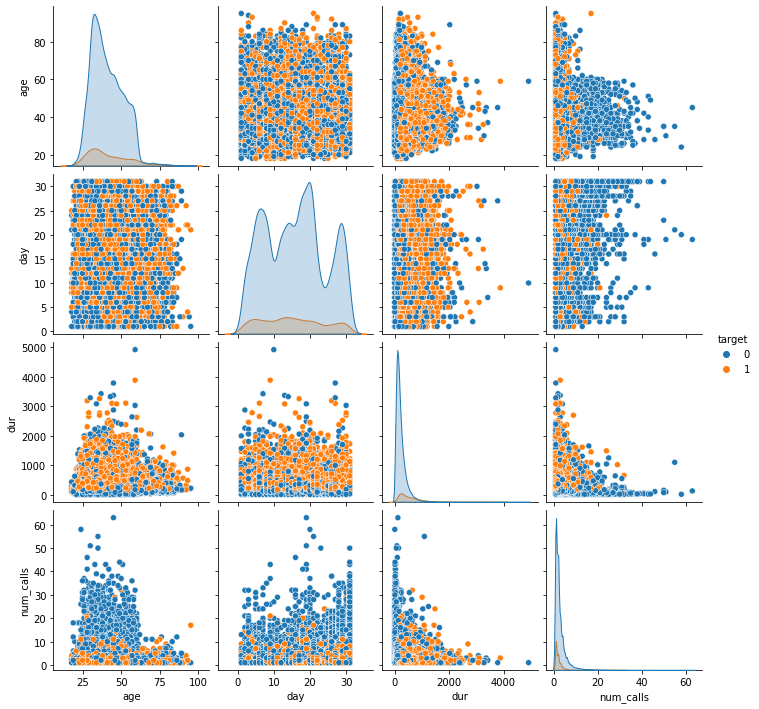

In [206]:
sns.pairplot(df,hue="target")

from correlation matrix it seems the "day" and "num_calls" features are not correlated to target.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day', ylabel='target'>

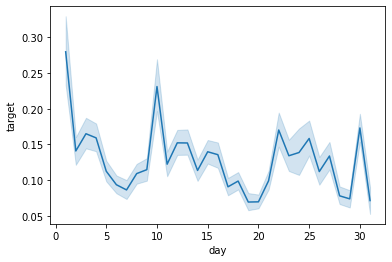

In [208]:
sns.lineplot(df["day"],df["target"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='num_calls', ylabel='target'>

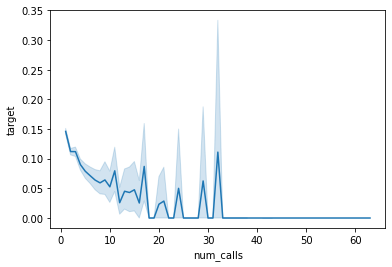

In [209]:
sns.lineplot(df["num_calls"],df["target"])

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'target'],
      dtype='object')

In [210]:
#deleting day and num_calls as it doesn't have linear relationship with target
del df['day']
del df['num_calls']

In [211]:
df.head()

,age,job,marital,education_qual,call_type,mon,dur,prev_outcome,target
0,58.0,management,married,tertiary,unknown,may,261.0,unknown,0
1,44.0,technician,single,secondary,unknown,may,151.0,unknown,0
2,33.0,entrepreneur,married,secondary,unknown,may,76.0,unknown,0
3,47.0,blue-collar,married,unknown,unknown,may,92.0,unknown,0
4,33.0,unknown,single,unknown,unknown,may,198.0,unknown,0


**Encoding of categorocal values**

In [212]:
#job,marital and Eduction features are linear relationship with target.hence done Lable encoding
df["job"]=df["job"].map({'management':6, 'technician':4, 'entrepreneur':1, 'blue-collar':0,'unknown':5, 'retired':9, 'admin.':6, 'services':2, 'self-employed':5,
                         'unemployed':7, 'housemaid':2, 'student':10})
df["marital"]=df["marital"].map({"married":0,"divorced":1,"single":2})
df["education_qual"]=df["education_qual"].map({"primary":0,"secondary":1,"unknown":2,"tertiary":3})
df = pd.get_dummies(df, columns = ['call_type','prev_outcome','mon'],drop_first=True)

In [213]:
df.head()

,age,job,marital,education_qual,dur,target,call_type_telephone,call_type_unknown,prev_outcome_other,prev_outcome_success,...,mon_dec,mon_feb,mon_jan,mon_jul,mon_jun,mon_mar,mon_may,mon_nov,mon_oct,mon_sep
0,58.0,6,0,3,261.0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,44.0,4,2,1,151.0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33.0,1,0,1,76.0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,47.0,0,0,2,92.0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,33.0,5,2,2,198.0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [214]:
x=df.drop("target",axis=1)
y=df["target"]

In [215]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import svm

In [216]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=2022)

**Creating pipeline for classifiers,Scaling and Crossvalidation**



In [217]:
pipe_lr = Pipeline([('pca',PCA()),
                    ('scl', StandardScaler()),
                    ('LR', LogisticRegression(random_state=2022))])
pipe_dt = Pipeline([('pca',PCA()),
                    ('scl', StandardScaler()),
                    ('DT',DecisionTreeClassifier(random_state=2022))])
pipe_rf = Pipeline([('pca',PCA()),
                    ('scl', StandardScaler()),
                    ('RF',RandomForestClassifier(random_state=2022))])
pipe_knn = Pipeline([('pca',PCA()),
                     ('scl', StandardScaler()),
                    ('KNN', KNeighborsClassifier())])
pipe_svm = Pipeline([('pca',PCA()),
                     ('scl', StandardScaler()),
                     ('SVM', svm.SVC(random_state=2022))])
pipe_xgb = Pipeline([('pca',PCA()),
                     ('scl', StandardScaler()),
                     ('XGB', XGBClassifier(random_state=2022))])

In [219]:
lr_param_grid = [{'LR__penalty': ['l2'],'LR__C':[2.0]}]
dt_param_grid = [{'DT__criterion': ['gini', 'entropy'],'DT__max_depth': [3,4,5,6,7]}]
rf_param_grid = [{'RF__criterion':['gini'],'RF__n_estimators':[10]}]
knn_param_grid = [{'KNN__n_neighbors':[10],'KNN__weights': ['uniform', 'distance'],'KNN__metric': ['euclidean']}]
svm_param_grid = [{'SVM__kernel': ['linear', 'rbf'], 'SVM__C':[6]}]
xgb_param_grid = [{'XGB__learning_rate': [0.3,0.5,0.6,0.8,1.0],'XGB__max_depth':[6]}]
cv=StratifiedKFold(n_splits=3)

In [220]:
lr_grid_search = GridSearchCV(estimator=pipe_lr,
        param_grid=lr_param_grid,
        scoring='roc_auc',
        cv=cv)
dt_grid_search = GridSearchCV(estimator=pipe_dt,
        param_grid=dt_param_grid,
        scoring='roc_auc',
        cv=cv)
rf_grid_search = GridSearchCV(estimator=pipe_rf,
        param_grid=rf_param_grid,
        scoring='roc_auc',
        cv=cv)
knn_grid_search = GridSearchCV(estimator=pipe_knn,
        param_grid=knn_param_grid,
        scoring='roc_auc',
        cv=cv)
svm_grid_search = GridSearchCV(estimator=pipe_svm,
        param_grid=svm_param_grid,
        scoring='roc_auc',
        cv=cv)
xgb_grid_search = GridSearchCV(estimator=pipe_xgb,
        param_grid=xgb_param_grid,
        scoring='roc_auc',
        cv=cv)

**Oversampling using SMOTE**

In [221]:
from imblearn.combine import SMOTETomek
sm=SMOTETomek()
x_train_,y_train_=sm.fit_resample(x_train,y_train)

In [222]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_train_))

Counter({0: 31942, 1: 4222})
Counter({0: 31724, 1: 31724})


In [223]:
grids = [lr_grid_search, dt_grid_search, rf_grid_search, knn_grid_search, svm_grid_search, xgb_grid_search]
for pipe in grids:
    pipe.fit(x_train_,y_train_)

In [224]:
from sklearn.metrics import roc_auc_score
grid_dict = {0: 'Logistic Regression', 1: 'Decision Trees', 
             2: 'Random Forest', 3: 'K-Nearest Neighbors', 
             4: 'Support Vector Machines', 5: 'XGBoost'}
for i, model in enumerate(grids):
    print('{} Test Accuracy: {}'.format(grid_dict[i],model.score(x_test,y_test)))
    y_pred=model.predict(x_test)
    print("AUROC:",roc_auc_score(y_test,y_pred))

Logistic Regression Test Accuracy: 0.8721741277709256
AUROC: 0.7296593497752419
Decision Trees Test Accuracy: 0.8778112981529239
AUROC: 0.7584289286949221
Random Forest Test Accuracy: 0.8690683216235334
AUROC: 0.7071371719099256
K-Nearest Neighbors Test Accuracy: 0.8570441211350198
AUROC: 0.7289102540143939
Support Vector Machines Test Accuracy: 0.8728780321424197
AUROC: 0.7372460379081123
XGBoost Test Accuracy: 0.9030420798240956
AUROC: 0.765692518962166


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


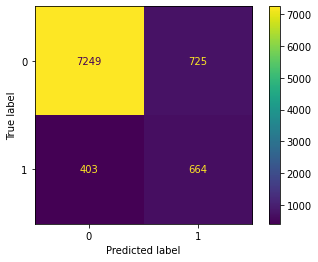

In [225]:
plot_confusion_matrix(xgb_grid_search, x_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


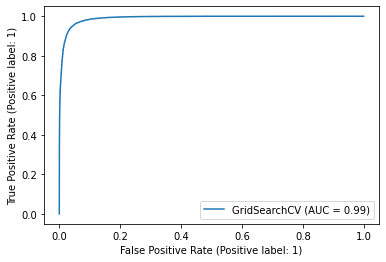

In [226]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(xgb_grid_search,x_train_,y_train_)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


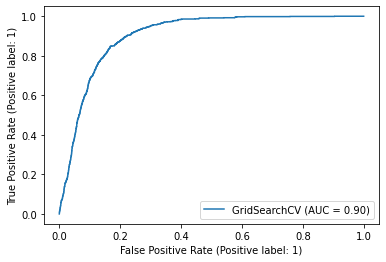

In [227]:
plot_roc_curve(xgb_grid_search,x_test,y_test)

In [243]:
xgb_grid_search.fit(x_train_,y_train_)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('scl', StandardScaler()),
                                       ('XGB',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_...
            

In [248]:
thresholds = list(zip(xgb_grid_search.best_estimator_.named_steps["XGB"].feature_importances_, df.columns[:-1]))
imp = pd.DataFrame(thresholds, columns = ["Importance","Feature"])
imp.sort_values("Importance",ascending = False,inplace=True,ignore_index=True)
imp

,Importance,Feature
0,0.516522,mon_oct
1,0.084872,age
2,0.058648,mon_nov
3,0.052238,call_type_unknown
4,0.050409,mon_aug
5,0.033403,mon_jul
6,0.024349,prev_outcome_success
7,0.023496,target
8,0.023426,mon_jun
9,0.023238,mon_dec


From the above classifiers XGBClassifier works with high performance score.

XGBoost provides feature importances, allowing for a better understanding of which variables are most important in making predictions.Hence it gives the better performance than other classifiers.